In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
#First Col of serial no not required
advertising = pd.read_csv('C:\\Users\\shubh\\Documents\\Python Scripts\\Machine Learning Algorithms\\Data/Advertising.csv', 
                          usecols=[1,2,3,4])
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Regression Plot-->fit.order=1 (Linear), confidence interval(ci) default=None, scatter_kws --> dict for scatter plot elements --> color, s
#Sales vs TV Advertising

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


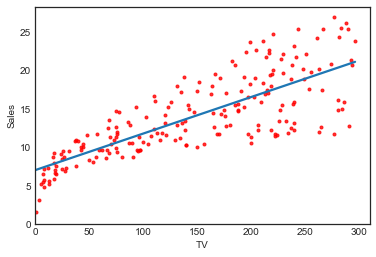

In [4]:
sns.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(ymin=0);

Regression Plot --> Radio vs Sales

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


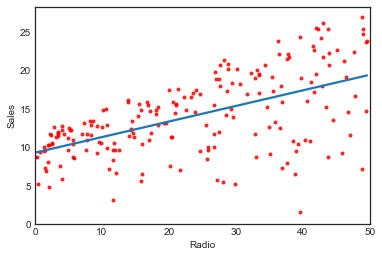

In [5]:
sns.regplot(advertising.Radio, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,50)
plt.ylim(ymin=0);

Regression Plot --> Newspaper vs Sales

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


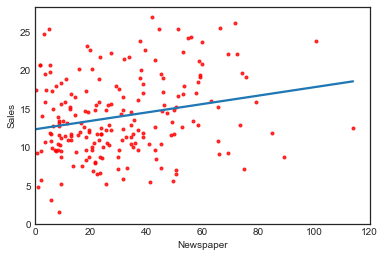

In [6]:
sns.regplot(advertising.Newspaper, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,120)
plt.ylim(ymin=0);

In [7]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [8]:
# Describe
advertising[['Radio', 'TV']].describe()

,Radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


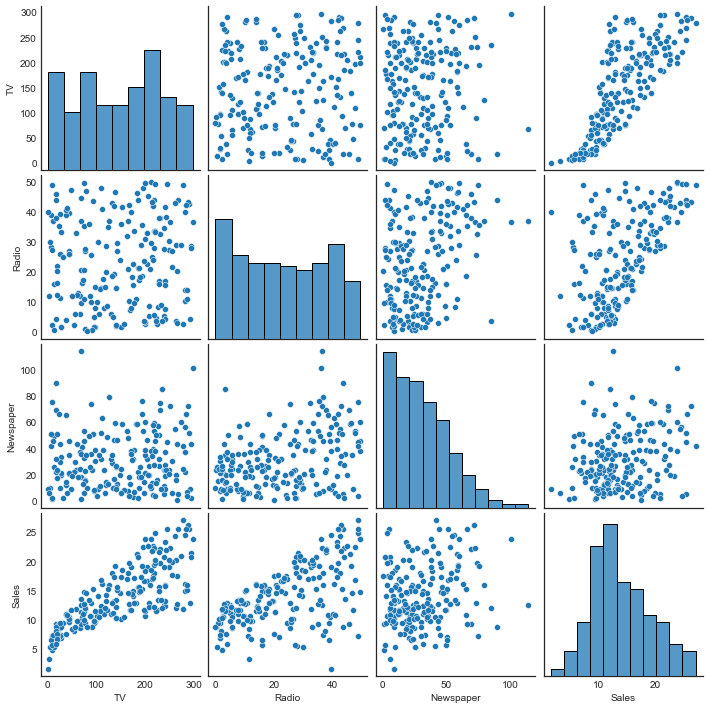

In [9]:
sns.pairplot(advertising)

Using sklearn linear Model -->Simple Linear Regression (Sales vs Advertising)

In [10]:
regr = skl_lm.LinearRegression()

X = advertising.TV.values.reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

7.032593549127693
[0.04753664]


In [12]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.611875050850071

Using Statsmodels --> Simple Linear Regression

Sales vs TV

In [13]:
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


Sales vs Radio

In [15]:
est = smf.ols('Sales ~ Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


Sales vs Newspaper

In [14]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


Multiple Linear Regression using Statsmodels

In [16]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           1.58e-96
Time:                        11:57:55   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Degree of Freedom Residuals:(no of obs – no of predictors – 1) or  (n-k-1)   n is no of obs, k =no of predictor-->200-3-1=196
Degree of Freedom of Model:No of predictors (k) -->3
R Squared:Reflects how well the model fits the observed data. R^2= SSR/ SST --> 0.897=89.7%
Adjusted R Squared:The adjusted  R^2 considers the number of predictor variables (the degrees of freedom) and number of observations. 
Adjusted R^2=R^2-(1-R^2)*(k/n-k-1) --> As df decreases  ie. more no of variables are added to the given model, In this case if adj R Square increases this means that new variable has added to the predictive accuracy of the model, if it decreases this means that the variable is not adding to the predictive accuracy of the model. --> 0.896 = 89.7%

F Statistic:For Model --> 570.3 
Prob (F-statistic):Value should be less than 0.05 --> 1.58x10^(-96)
Log-Likelihood:To analyze different Models --> -386.18
AIC(Akiake Info Criteria):Analysis of two models based on Information (The AIC is a relative estimate of information loss between different models)--> 780.4
BIC-Bayesian Info Criteria:Analysis of two models based on probability --> 793.6
T test or 1 way Anova: For 1 Y & 1 X
P Value:Value should be 0.05

Skew:Residual Distribution of Model --> -1.327
Kurtosis:Measure of peakiness of Residuals of Model  Higher value means more peak implying tighter clustering of residuals indicates better model with few  outliers--> 6.332 
Durbin Watson:Tests for Homoscedasticity (Around 2 No Homoscedasticity)--> 2.084
Jarque Bera:This test considers kurtosis(K) and skewness(S) & checks for normal distribution of residuals.--> 151.241
Probability(Jarque Bera):P Value from Hypothesis Testing (Ho:Residuals are normally distributed,H1:Not Normal --> 1.44x10^-33
Condition No:If the condition number is greater than thirty, then the regression may have multicollinearity --> 454
Omnibus Test:This test uses skewness and kurtosis of residuals to test the null hypothesis that the distribution of residuals is normal--> 60.414
Probability (Omnibus):Close to 1, less value means not normal--> 0.00